# Lab 2: Códigos Cíclicos

Alunos: Fernando Zanchitta e Guilherme Kowalczuk

# 1. Simulação

In [16]:
from channel import BSC
from encoder import NaiveEncoder, ConvolutionalEncoder
from lab1 import Simulator
from helpers import safe_load

import numpy as np
import random
random.seed(2023)

p = [5e-1, 2e-1, 1e-1, 5e-2, 2e-2, 1e-2, 5e-3, 2e-3, 1e-3, 5e-4, 2e-4, 1e-4, 5e-5, 2e-5, 1e-5]

## 1.1. Naive Encoder

In [6]:
k = 4
l = 1000000//k
naive_encoder = NaiveEncoder()

channels = map(BSC, p)
sim = map(lambda channel: Simulator(naive_encoder, channel, k=k, l=l), channels)
simulated = zip(p, map(Simulator.simulate, sim))
naive_sim = safe_load('lab3_values/naive.pickle', lambda: list(simulated))

print(naive_sim)

[(0.5, 0.500831), (0.2, 0.199307), (0.1, 0.100258), (0.05, 0.050281), (0.02, 0.020018), (0.01, 0.009992), (0.005, 0.004897), (0.002, 0.001971), (0.001, 0.001009), (0.0005, 0.000483), (0.0002, 0.000207), (0.0001, 0.000105), (5e-05, 4.1e-05), (2e-05, 2e-05), (1e-05, 1.2e-05)]


## 1.2. Convolutional Encoder

In [70]:
p = np.logspace(np.log10(0.5), np.log10(0.005), 10)

def simulate_convolutional(m,G,k=None):
    n = 3
    conv_encoder = ConvolutionalEncoder(n, m, G)

    conv_sim = []
    for prob in p:
        if k is None:
            sim_k = min(int(8000/prob), 1_000_000)
        else:
            sim_k = k
        channel = BSC(prob)
        sim = Simulator(conv_encoder, channel, k=sim_k, l=1)
        simulated = sim.simulate()
        conv_sim.append(simulated)

    return list(zip(p, conv_sim))

mG = [
    (3, np.array([[1,0,1,1], [1,1,0,1], [1,1,1,1]])),
    (4, np.array([[1,0,1,0,1], [1,1,0,1,1], [1,1,1,1,1]])), 
    (6, np.array([[1,0,0,1,1,1,1], [1,0,1,0,1,1,1], [1,1,0,1,1,0,1]])),
]

conv_sim = []
for m,G in mG:
    sim = safe_load(f'lab3_values/conv{m}_logspace2.pickle', lambda: simulate_convolutional(m,G))
    conv_sim.append(sim)
    print(f'm={m}')
    print(sim)

words len: 16000
encoded len: 48000
transmitted len: 48000


100%|██████████| 16000/16000 [00:02<00:00, 5659.67it/s]


decoded len: 16000
words len: 26689
encoded len: 80067
transmitted len: 80067


100%|██████████| 26689/26689 [00:04<00:00, 5875.12it/s]


decoded len: 26689
words len: 44520
encoded len: 133560
transmitted len: 133560


100%|██████████| 44520/44520 [00:07<00:00, 5831.86it/s]


decoded len: 44520
words len: 74265
encoded len: 222795
transmitted len: 222795


100%|██████████| 74265/74265 [00:12<00:00, 5836.33it/s]


decoded len: 74265
words len: 123882
encoded len: 371646
transmitted len: 371646


100%|██████████| 123882/123882 [00:21<00:00, 5819.54it/s]


decoded len: 123882
words len: 206647
encoded len: 619941
transmitted len: 619941


100%|██████████| 206647/206647 [00:35<00:00, 5744.88it/s]


decoded len: 206647
words len: 344709
encoded len: 1034127
transmitted len: 1034127


100%|██████████| 344709/344709 [00:59<00:00, 5812.30it/s]


decoded len: 344709
words len: 575010
encoded len: 1725030
transmitted len: 1725030


100%|██████████| 575010/575010 [01:38<00:00, 5830.12it/s]


decoded len: 575010
words len: 959174
encoded len: 2877522
transmitted len: 2877522


 48%|████▊     | 460348/959174 [02:33<01:26, 5737.11it/s] 

In [28]:
from scipy import special as sp
from math import sqrt


def qfunc(x):
    return 0.5-0.5*sp.erf(x/sqrt(2))

def invqfunc(x):
    return sqrt(2)*sp.erfinv(1-2*x)

def translate(p, R, db=True):
    eb_n0 = map(lambda x: (invqfunc(x)**2)/(2*R), p)
    # if db:
    #     eb_n0 = map(lambda x: 10*np.log10(x), eb_n0)
    return list(eb_n0)


[-15.099863627029857, -9.511975842706372, -6.377402797098956, -4.229458457521621, -2.612203555096631, -1.3245286762788342, -0.2603063982666214, 0.6431003661195772, 1.425632252114458, 2.1142492603095064, 2.7279642608421457, 3.2806607699559813, 3.7827687429616867, 4.242310930886444, 4.665582949827932, 5.057610406815361, 5.422465099795102, 5.7634892106705395, 6.083457726420796]
[0.4429333952050413, 0.39237998517573064, 0.3475963980887803, 0.30792410553301314, 0.27277973905842595, 0.2416465119285877, 0.2140666199359697, 0.18963450953661246, 0.1679909143141891, 0.14881757208156593, 0.1318325449365179, 0.1167860734545061, 0.1034569040557395, 0.09164903554162182, 0.08118883695943607, 0.07192249441438314, 0.06371374928515669, 0.056441894584234466, 0.049999999999999996]


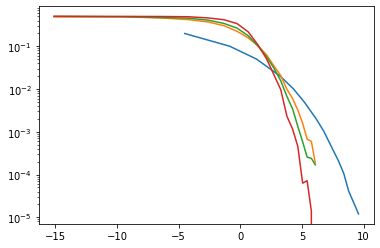

In [35]:
import matplotlib.pyplot as plt

p = [5e-1, 2e-1, 1e-1, 5e-2, 2e-2, 1e-2, 5e-3, 2e-3, 1e-3, 5e-4, 2e-4, 1e-4, 5e-5, 2e-5, 1e-5]

fig = plt.figure()
ax = plt.gca()
plt.plot(translate([k for k,_ in naive_sim[1:]], 1), [v for _,v in naive_sim[1:]])
plt.plot(translate([k for k,_ in conv_sim[0][1:]], 1/3), [v for _,v in conv_sim[0][1:]])
plt.plot(translate([k for k,_ in conv_sim[1][1:]], 1/3), [v for _,v in conv_sim[1][1:]])
plt.plot(translate([k for k,_ in conv_sim[2][1:]], 1/3), [v for _,v in conv_sim[2][1:]])

print(translate([k for k,_ in conv_sim[0][1:]], 1/3))
print([k for k,_ in conv_sim[0][1:]])
ax.set_yscale('log')
# ax.set_xscale('log')
# ax.invert_xaxis()

In [26]:
k = int(1e6)
channel = BSC(1e-3)
word = np.zeros((k,), int)
received = channel.transmit(word)
errors = received.sum()
errors/k

0.001004

In [21]:
k

1000000